In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob
from pathlib import Path
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = 'C:\\Users\\unger\\Documents\\entsoe-data\\'

This will import the data, you have to run it to be able to solve the homework.

In [2]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Concatenating 68 csv files...
Loading done.


# Exercise 1 - Calculate the relation of Wednesday average consumption to Sunday average consumption for selected countries

In this exercise, calculate the relation of Wednesday average consumption to Sunday average consumption for the following countries: Austria, Germany, United Kingdom, Spain, Sweden, Italy, Croatia.

(1) First create a variable that contains only power consumption data for these countries. The pandas command ```isin()``` may be very helpful here. Reduce the data to only consider the period 2015-01-01 until 2019-12-31. The lecture slides may contain relevant code here.

(2) Then, group the data by weekday and country (i.e. AreaName). Use ```groupby``` and ```mean```for that purpose. 

(3) Calculate for all countries the proportion of Wednesday (day 2) and Sunday (day 6) by dividing the two values.

(4) For which country, this relative value is highest? What could this indicate?

In [3]:
power_demand


,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2014-12-31 23:00:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7412.14,2017-09-14 04:16:36
2014-12-31 23:15:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7305.11,2017-09-14 04:16:36
2014-12-31 23:30:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7263.03,2017-09-14 04:16:36
2014-12-31 23:45:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7103.58,2017-09-14 04:16:36
2015-01-01 00:00:00,2015,1,1,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,6958.62,2017-09-14 04:00:17
...,...,...,...,...,...,...,...,...,...,...
2020-05-06 12:00:00,2020,5,6,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6978.58,2020-05-06 22:46:19
2020-05-06 13:00:00,2020,5,6,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6460.15,2020-05-06 23:31:16
2020-05-06 14:00:00,2020,5,6,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6856.83,2020-05-07 00:31:05


In [4]:
power_demand["AreaName"].unique()


array(['50Hertz CA', 'APG BZ', 'APG CA', 'AST BZ', 'AST CA', 'Albania',
       'Amprion CA', 'Austria', 'Belgium', 'Bosnia Herzegovina',
       'Bulgaria', 'CEPS BZ', 'CEPS CA', 'CGES BZ', 'CGES CA', 'CREOS CA',
       'Croatia', 'Cyprus', 'Cyprus TSO BZ', 'Cyprus TSO CA',
       'Czech Republic', 'DE-AT-LU BZ', 'DE-LU BZ', 'DK1  BZ', 'DK2 BZ',
       'Denmark', 'ELES BZ', 'ELES CA', 'EMS BZ', 'EMS CA', 'ESO BZ',
       'ESO CA', 'EirGrid CA', 'Elering BZ', 'Elering CA', 'Elia BZ',
       'Elia CA', 'Energinet CA', 'Estonia', 'Fingrid BZ', 'Fingrid CA',
       'Finland', 'France', 'Germany', 'Greece', 'HOPS BZ', 'HOPS CA',
       'Hungary', 'IPTO BZ', 'IPTO CA', 'IT-Centre-North BZ',
       'IT-Centre-South BZ', 'IT-North BZ', 'IT-Sardinia BZ',
       'IT-Sicily BZ', 'IT-South BZ', 'Ireland', 'Ireland - (SEM) BZ',
       'Italy', 'Italy CA', 'Latvia', 'Litgrid BZ', 'Litgrid CA',
       'Lithuania', 'Luxembourg', 'MAVIR BZ', 'MAVIR CA', 'MD BZ',
       'MD CA', 'MEPSO BZ', 'MEPSO CA', '

In [50]:

#creating variable
countries = power_demand['AreaName'].isin(['Austria', 'Germany', 'United Kingdom', 'Spain', 'Sweden', 'Italy', 'Croatia'])
#filter countries
power_demand_countries = power_demand[countries]
#filter time
power_demand_countries_time = power_demand_countries[ '2015-01-01' : '2020-01-01']

power_demand_countries_time

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2015-01-01 00:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6017.2,2017-09-14 04:00:15
2015-01-01 00:15:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5966.8,2017-09-14 04:00:15
2015-01-01 00:30:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5935.6,2017-09-14 04:00:15
2015-01-01 00:45:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5934.4,2017-09-14 04:00:15
2015-01-01 01:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5750.8,2017-09-14 04:00:15
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 21:30:00,2020,1,1,PT30M,GB,CTY,United Kingdom,GB,34725.0,2020-01-06 22:31:19
2020-01-01 22:00:00,2020,1,1,PT30M,GB,CTY,United Kingdom,GB,32156.0,2020-01-06 22:31:19
2020-01-01 22:30:00,2020,1,1,PT30M,GB,CTY,United Kingdom,GB,30832.0,2020-01-06 22:31:19


In [51]:

power_demand_weekday_countries_mean = power_demand_countries_time.groupby([
    power_demand_countries_time.index.weekday,
    'AreaName']).mean()


In [52]:
power_demand_weekday_countries_mean

Year     Month        Day  TotalLoadValue
DateTime AreaName                                                        
0        Austria         2017.003831  6.521073  15.701149     7400.972206
         Croatia         2017.003831  6.521073  15.701149     2027.824553
         Germany         2017.003792  6.521293  15.701457    57899.311051
         Italy           2017.003831  6.521073  15.701149    34013.568646
         Spain           2017.004792  6.522524  15.699361    29367.402875
         Sweden          2017.003831  6.521073  15.701149    16149.643678
         United Kingdom  2016.920473  6.613992  15.684141    36977.463284
1        Austria         2017.007663  6.505747  15.770115     7542.120003
         Croatia         2017.007824  6.505668  15.769599     2062.263292
         Germany         2017.007623  6.505927  15.770226    59594.760724
         Italy           2017.007663  6.505747  15.770115    35546.978448
         Spain           2017.008148  6.505033  15.774085    30005.923790
         Sweden          2017.007345  6.505189  15.768003    16183.075842
         United Kingdom  2016.924974  6.608020  15.879789    37649.736703
2        Austria         2017.011494  6.494253  15.720307     7592.198659
         Croatia         2017.011494  6.494253  15.720307     2071.332535
         Germany         2017.011494  6.494253  15.720307    59833.886019
         Italy           2017.011494  6.494253  15.720307    35876.291347
         Spain           2017.012143  6.493050  15.720882    30080.474996
         Sweden          2017.011494  6.494253  15.720307    16187.522190
         United Kingdom  2016.928058  6.586689  15.817262    37667.243619
3        Austria         2016.992337  6.524904  15.785441     7531.484722
         Croatia         2016.992337  6.524904  15.785441     2070.504470
         Germany         2016.992257  6.525106  15.784625    59376.633233
         Italy           2016.992337  6.524904  15.785441    35810.509738
         Spain           2016.993610  6.527157  15.786581    29979.879712
         Sweden          2016.992337  6.524904  15.785441    16103.485951
         United Kingdom  2016.916083  6.561467  15.998973    37563.410436
4        Austria         2016.996169  6.517241  15.620690     7370.000862
         Croatia         2016.996169  6.517241  15.620690     2065.382344
         Germany         2016.996049  6.517323  15.620739    58201.758320
         Italy           2016.996169  6.517241  15.620690    35333.149106
         Spain           2017.001921  6.528658  15.656580    29655.860070
         Sweden          2016.996487  6.516366  15.621427    15740.090691
         United Kingdom  2016.907066  6.571081  15.755077    37102.554703
5        Austria         2016.996169  6.544061  15.800766     6448.911574
         Croatia         2016.996169  6.544061  15.800766     1926.927203
         Germany         2016.996169  6.544061  15.800766    49936.054741
         Italy           2016.996169  6.544061  15.800766    29623.509579
         Spain           2016.996169  6.544061  15.800766    26691.214719
         Sweden          2017.003846  6.523077  15.815385    14501.897917
         United Kingdom  2016.899164  6.587257  15.754910    34009.274222
6        Austria         2017.000000  6.536398  15.639847     5982.295785
         Croatia         2017.000000  6.536398  15.639847     1802.134738
         Germany         2016.999960  6.536619  15.640192    46127.261956
         Italy           2017.000000  6.536398  15.639847    26104.259419
         Spain           2017.000000  6.536398  15.639847    24857.647031
         Sweden          2017.007051  6.515705  15.647756    14489.429647
         United Kingdom  2016.906455  6.574310  15.559204    33251.563333

In [53]:
power_demand_wednesday = power_demand_weekday_countries_mean.loc[2, 'TotalLoadValue']
power_demand_sunday = power_demand_weekday_countries_mean.loc[6, 'TotalLoadValue']

print(power_demand_wednesday, 'Power Demand Wednesday')

print(power_demand_sunday, 'Power Demand Sunday')

AreaName
Austria            7592.198659
Croatia            2071.332535
Germany           59833.886019
Italy             35876.291347
Spain             30080.474996
Sweden            16187.522190
United Kingdom    37667.243619
Name: TotalLoadValue, dtype: float64 Power Demand Wednesday
AreaName
Austria            5982.295785
Croatia            1802.134738
Germany           46127.261956
Italy             26104.259419
Spain             24857.647031
Sweden            14489.429647
United Kingdom    33251.563333
Name: TotalLoadValue, dtype: float64 Power Demand Sunday


In [54]:
power_demand_propotion = power_demand_wednesday/power_demand_sunday
power_demand_propotion

AreaName
Austria           1.269111
Croatia           1.149377
Germany           1.297148
Italy             1.374346
Spain             1.210110
Sweden            1.117195
United Kingdom    1.132796
Name: TotalLoadValue, dtype: float64

The highest relative value is in Italy, indicating that there is more power consumption on wednesday than on sunday. 
The reason for that could be that businesses and shops are closed and people do not stay at home at sundays. 

# Exercise 2 - Calculate the monthly average consumption as deviation from mean consumption

For the same countries as in the above dataset, calculate the monthly mean consumption as deviation from the mean of consumption over the whole time. Plot the curves for all countries.

(1) First create a variable that contains only power consumption data for the selected countries. The pandas command ```isin()``` may be very helpful here. If you did Exercise 1, you can use the same dataset.

(2) Then, aggregate the data by country (i.e. AreaName) and month. Use ```groupby``` and ```mean``` for that purpose. Select the column ```TotalLoadValue``` from the result.

(3)  Aggregate the data by country (i..e AreaName) only, i.e. calculate the average consumption by country using ```groupby``` and ```mean```. Select the column ```TotalLoadValue``` from the result.

(4) Divide the result of (2) by (3) and observe how well broadcasting works here.

(5) Use the command ```unstack``` on the result. How does the table look now? Plot the result. If your resulting, unstacked dataframe is called ```result```, you may use ```result.plot()``` to get a nice plot.

(6) How would you explain the difference in the curve between Croatia and Sweden?


In [59]:
power_demand_monthly_countries_mean = power_demand_countries_time.groupby([
    power_demand_countries_time.index.month,
    'AreaName']).mean()
power_demand_monthly_countries_mean


Year  Month        Day  TotalLoadValue
DateTime AreaName                                                     
1        Austria         2017.019231    1.0  15.903846     7922.184936
         Croatia         2017.019231    1.0  15.903846     2167.469818
         Germany         2017.019034    1.0  15.904762    59366.044856
         Italy           2017.019231    1.0  15.903846    34007.838141
         Spain           2017.025723    1.0  15.941586    30470.290461
...                              ...    ...        ...             ...
12       Germany         2017.000000   12.0  16.000000    56849.113073
         Italy           2017.000000   12.0  16.000000    32592.034140
         Spain           2017.000000   12.0  16.000000    28642.714516
         Sweden          2017.026144   12.0  16.046296    18057.871460
         United Kingdom  2016.999832   12.0  15.994954    38694.120942

[84 rows x 4 columns]

In [73]:
x = power_demand_monthly_countries_mean['TotalLoadValue']
x


DateTime  AreaName      
1         Austria            7922.184936
          Croatia            2167.469818
          Germany           59366.044856
          Italy             34007.838141
          Spain             30470.290461
                                ...     
12        Germany           56849.113073
          Italy             32592.034140
          Spain             28642.714516
          Sweden            18057.871460
          United Kingdom    38694.120942
Name: TotalLoadValue, Length: 84, dtype: float64

In [74]:
power_demand_country = power_demand_countries_time.groupby('AreaName').mean()
y = power_demand_country['TotalLoadValue']
y

AreaName
Austria            7123.997687
Croatia            2003.765685
Germany           55852.764913
Italy             33186.895183
Spain             28661.721241
Sweden            15623.382780
United Kingdom    36317.021083
Name: TotalLoadValue, dtype: float64

In [76]:
monthly_average_consumption = x/y
monthly_average_consumption

DateTime  AreaName      
1         Austria           1.112042
          Croatia           1.081698
          Germany           1.062903
          Italy             1.024737
          Spain             1.063101
                              ...   
12        Germany           1.017839
          Italy             0.982075
          Spain             0.999337
          Sweden            1.155823
          United Kingdom    1.065454
Name: TotalLoadValue, Length: 84, dtype: float64

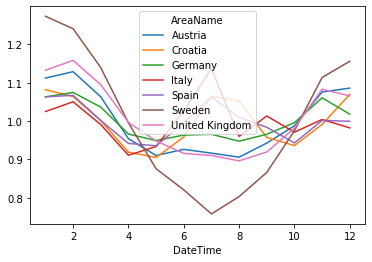

In [89]:
result = monthly_average_consumption.unstack()
result.plot()

The summer in sweden is not very hot and there is much daylight, so not much power is needed for cooling, light etc., whereas the summer in Croatia is quite hot. 

# Exercise 3 - calculate the hourly average consumption as deviation from mean consumption

Do the same as in exercise 2, but now for the hourly average consumption. I.e. how much is consumed on each of the 24 hours of a day?

Which country has the lowest, which the highest variability? What may be the reason for it?

In [91]:
power_demand_hourly_countries_mean = power_demand_countries_time.groupby([
    power_demand_countries_time.index.hour,
    'AreaName']).mean()
power_demand_hourly_countries_mean

Year     Month        Day  TotalLoadValue
DateTime AreaName                                                        
0        Austria         2017.001095  6.520525  15.719759     5655.636836
         Croatia         2017.001095  6.520525  15.719759     1500.314176
         Germany         2017.001095  6.520525  15.719759    44153.352630
         Italy           2017.001095  6.520525  15.719759    24835.767378
         Spain           2017.001095  6.520525  15.719759    23930.950739
...                              ...       ...        ...             ...
23       Germany         2017.001095  6.520525  15.719759    45548.072477
         Italy           2017.001095  6.520525  15.719759    26144.135194
         Spain           2017.001095  6.520525  15.719759    25329.189929
         Sweden          2017.002193  6.512610  15.717105    13504.632127
         United Kingdom  2016.910207  6.576550  15.760336    29568.092700

[168 rows x 4 columns]

In [92]:
a = power_demand_hourly_countries_mean['TotalLoadValue']
a


DateTime  AreaName      
0         Austria            5655.636836
          Croatia            1500.314176
          Germany           44153.352630
          Italy             24835.767378
          Spain             23930.950739
                                ...     
23        Germany           45548.072477
          Italy             26144.135194
          Spain             25329.189929
          Sweden            13504.632127
          United Kingdom    29568.092700
Name: TotalLoadValue, Length: 168, dtype: float64

In [93]:
power_demand_country = power_demand_countries_time.groupby('AreaName').mean()
y = power_demand_country['TotalLoadValue']
y

AreaName
Austria            7123.997687
Croatia            2003.765685
Germany           55852.764913
Italy             33186.895183
Spain             28661.721241
Sweden            15623.382780
United Kingdom    36317.021083
Name: TotalLoadValue, dtype: float64

In [95]:
hourly_average_consumption = a/y
hourly_average_consumption

DateTime  AreaName      
0         Austria           0.793885
          Croatia           0.748747
          Germany           0.790531
          Italy             0.748361
          Spain             0.834945
                              ...   
23        Germany           0.815503
          Italy             0.787785
          Spain             0.883729
          Sweden            0.864386
          United Kingdom    0.814166
Name: TotalLoadValue, Length: 168, dtype: float64

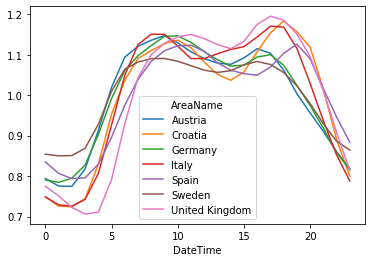

In [96]:
result = hourly_average_consumption.unstack()
result.plot()

In [100]:
hourly_average_consumption.var()

0.019113532739403426

# Exercise 4 - Calculate the average load per capita

Below you find a table with population data for our selected countries. You should use it to calculate per capita consumption.

(1) Calculate the average load in all countries using ```groupby``` and ```mean``` and select the column ```TotalLoadValue``` from the result.

(2) Divide the result by the ```Population``` column of the dataframe ```population```. Observe, how broadcasting helps here nicely.

(3) Plot the result. Which country has the highest load, which the lowest? What may be the reason? In which unit is this value? How could we convert it to MWh per year?

In [105]:
population = pd.DataFrame({'Country': ["Austria", "Croatia", "Germany", "Italy", "Spain", "Sweden", "United Kingdom"],
             'Population': [8840521, 4087843, 82905782, 60421760, 46796540, 10175214, 66460344]})

population.index = population["Country"]

population_only = population["Population"]

population_only

Country
Austria            8840521
Croatia            4087843
Germany           82905782
Italy             60421760
Spain             46796540
Sweden            10175214
United Kingdom    66460344
Name: Population, dtype: int64

In [102]:
power_demand_country = power_demand_countries_time.groupby('AreaName').mean()
y = power_demand_country['TotalLoadValue']
y

AreaName
Austria            7123.997687
Croatia            2003.765685
Germany           55852.764913
Italy             33186.895183
Spain             28661.721241
Sweden            15623.382780
United Kingdom    36317.021083
Name: TotalLoadValue, dtype: float64

In [107]:
demand_per_capita = y/population_only
demand_per_capita

AreaName
Austria           0.000806
Croatia           0.000490
Germany           0.000674
Italy             0.000549
Spain             0.000612
Sweden            0.001535
United Kingdom    0.000546
dtype: float64

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


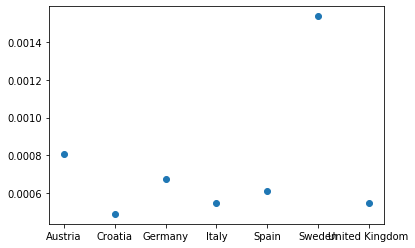

In [113]:
plt.plot(demand_per_capita, 'o', label='Per Capita Demand')

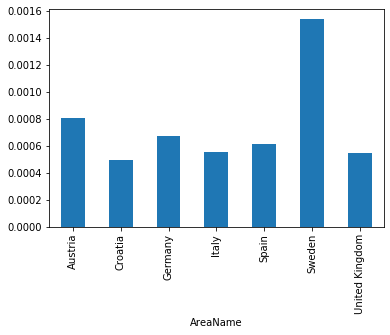

In [125]:
demand_per_capita.plot.bar()

The country with the highest load is sweden, the country with the lowes load is croatia. This could be because sweden is a wealthy country, with high fluctuation in terms of temperature and sunlight over the year. 